Housing California - Ejercicio

#  PASO 1: Carga del conjunto de datos

### Guardar el data

In [90]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score



In [91]:
#warnings.filterwarnings("ignore")

In [92]:
url = "https://raw.githubusercontent.com/4GeeksAcademy/k-means-project-tutorial/main/housing.csv"
df = pd.read_csv(url)

df.head()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


### Info y limpieza del data

In [93]:
df.shape

(20640, 9)

In [94]:
print("Conteo de nulos por columna:")
print(df.isnull().sum())


Conteo de nulos por columna:
MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64


In [95]:
df_dupli = df.duplicated().any()
print(f"¿Existen duplicados? {df_dupli}")


¿Existen duplicados? False


In [96]:
# Mantener solo las columnas requeridas
df = df[['Latitude', 'Longitude', 'MedInc']]
df.head()


,Latitude,Longitude,MedInc
0,37.88,-122.23,8.3252
1,37.86,-122.22,8.3014
2,37.85,-122.24,7.2574
3,37.85,-122.25,5.6431
4,37.85,-122.25,3.8462


In [97]:
df.to_csv('housing.csv', index=False)
"Archivo 'housing.csv' creado con éxito en el directorio actual."

"Archivo 'housing.csv' creado con éxito en el directorio actual."

### Separación de datos

In [98]:
from sklearn.model_selection import train_test_split
X_train, X_test = train_test_split(df, test_size=0.2, random_state=42)

In [99]:
print("Datos cargados y divididos:")
print(f"Train shape: {X_train.shape}")
print(f"Test shape: {X_test.shape}")

Datos cargados y divididos:
Train shape: (16512, 3)
Test shape: (4128, 3)


# Paso 2: Construye un K-Means

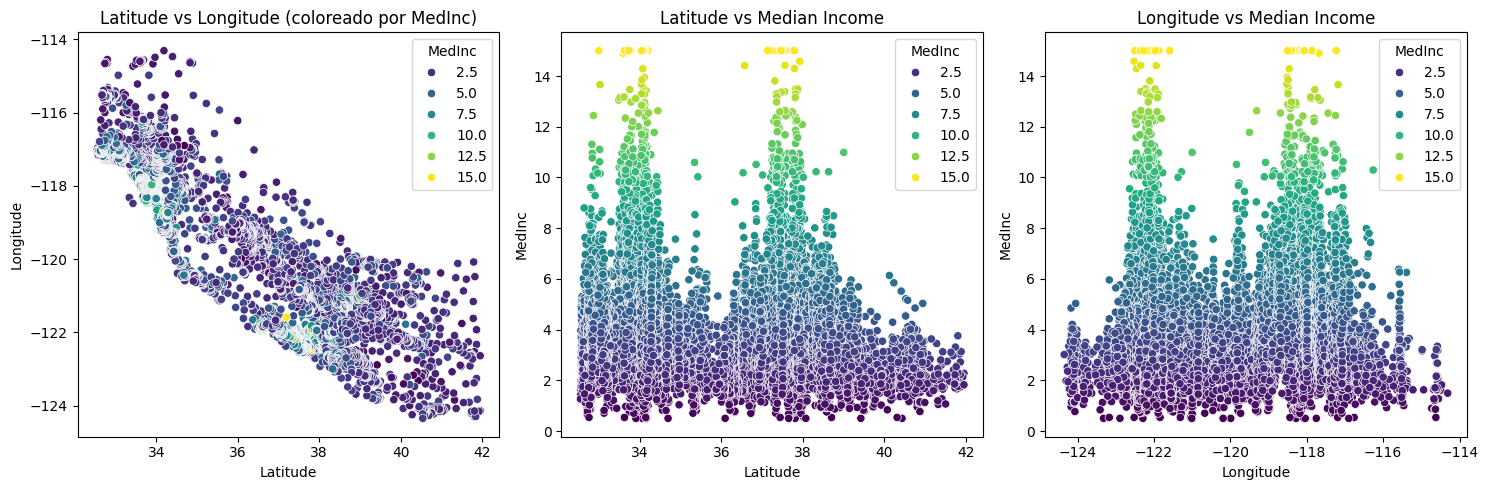

In [100]:
fig, axis = plt.subplots(1, 3, figsize=(15, 5))

# Scatterplot 1: Latitude vs Longitude, coloreado por MedInc
sns.scatterplot(ax=axis[0], data=df, x="Latitude", y="Longitude", hue="MedInc", palette="viridis")
axis[0].set_title("Latitude vs Longitude (coloreado por MedInc)")

# Scatterplot 2: Latitude vs MedInc
sns.scatterplot(ax=axis[1], data=df, x="Latitude", y="MedInc", hue="MedInc", palette="viridis")
axis[1].set_title("Latitude vs Median Income")

# Scatterplot 3: Longitude vs MedInc
sns.scatterplot(ax=axis[2], data=df, x="Longitude", y="MedInc", hue="MedInc", palette="viridis")
axis[2].set_title("Longitude vs Median Income")

plt.tight_layout()
plt.colorbar = True
plt.show()


In [101]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=6, random_state=42)
model.fit(X_train)


KMeans(n_clusters=6, random_state=42)

In [102]:
y_train = list(model.labels_)
X_train["cluster"] = y_train
X_train["cluster"].value_counts()
#

cluster
3    4368
5    4356
1    3807
0    2455
2    1280
4     246
Name: count, dtype: int64

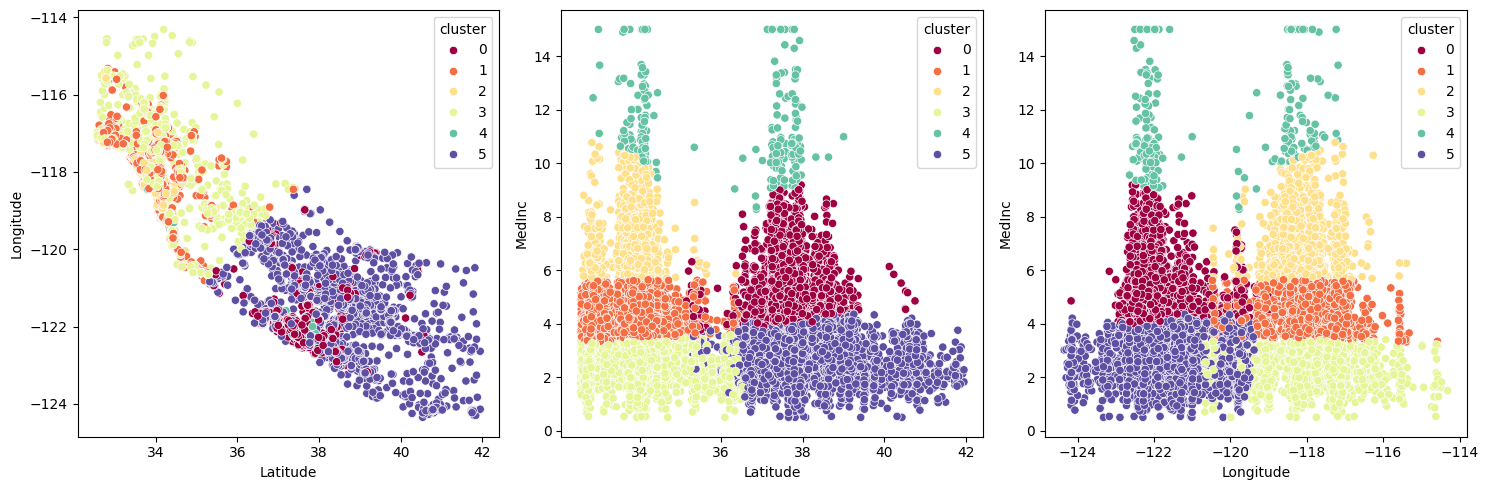

In [103]:
fig, axis = plt.subplots(1, 3, figsize=(15, 5))
sns.scatterplot(ax=axis[0], data=X_train, x="Latitude", y="Longitude", hue="cluster", palette="Spectral")
sns.scatterplot(ax=axis[1], data=X_train, x="Latitude", y="MedInc", hue="cluster", palette="Spectral")
sns.scatterplot(ax=axis[2], data=X_train, x="Longitude", y="MedInc", hue="cluster", palette="Spectral")
plt.tight_layout()
plt.show()


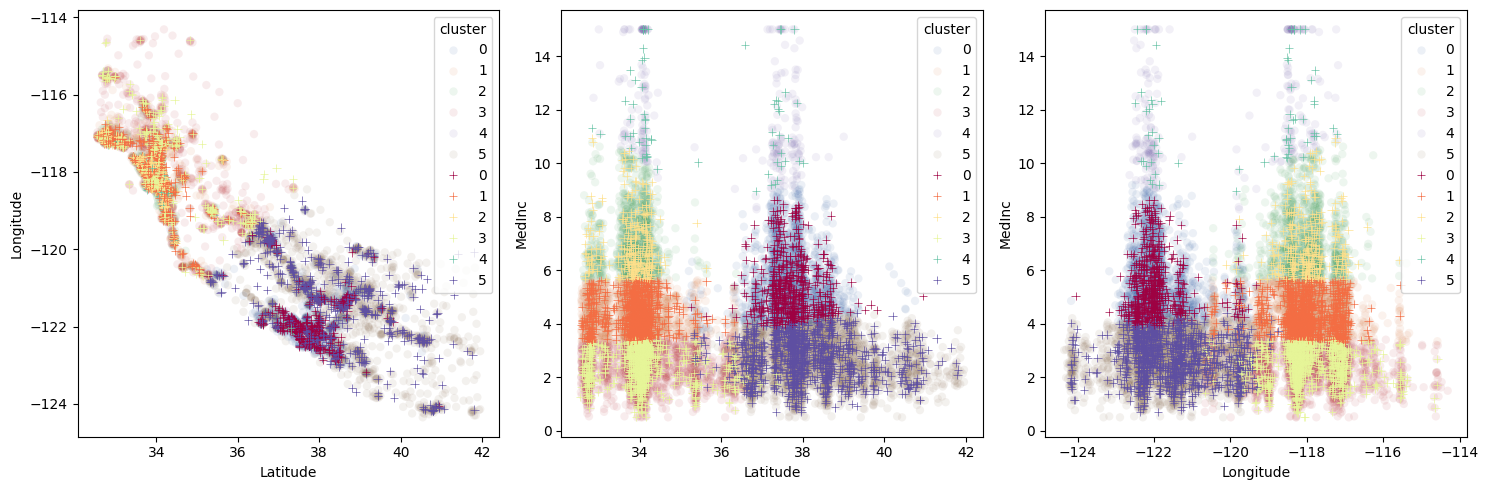

In [104]:
y_test = list(model.predict(X_test))
X_test["cluster"] = y_test

fig, axis = plt.subplots(1, 3, figsize=(15, 5))
sns.scatterplot(ax=axis[0], data=X_train, x="Latitude", y="Longitude", hue="cluster", palette="deep", alpha=0.1)
sns.scatterplot(ax=axis[1], data=X_train, x="Latitude", y="MedInc", hue="cluster", palette="deep", alpha=0.1)
sns.scatterplot(ax=axis[2], data=X_train, x="Longitude", y="MedInc", hue="cluster", palette="deep", alpha=0.1)

sns.scatterplot(ax=axis[0], data=X_test, x="Latitude", y="Longitude", hue="cluster", palette="Spectral", marker="+")
sns.scatterplot(ax=axis[1], data=X_test, x="Latitude", y="MedInc", hue="cluster", palette="Spectral", marker="+")
sns.scatterplot(ax=axis[2], data=X_test, x="Longitude", y="MedInc", hue="cluster", palette="Spectral", marker="+")
plt.tight_layout()
plt.show()


### Modelo supervisado

Voy a probar con RandomForest y con Grandient Boosting

In [105]:
X_test["predicted_cluster_rf"] = rf_predictions
X_test["predicted_cluster_gbm"] = gbm_predictions

# Evaluar la precisión usando las predicciones
rf_accuracy = accuracy_score(y_test, X_test["predicted_cluster_rf"])
gbm_accuracy = accuracy_score(y_test, X_test["predicted_cluster_gbm"])

print(f"Random Forest Accuracy: {rf_accuracy}")
print(f"Gradient Boosting Accuracy: {gbm_accuracy}")


Random Forest Accuracy: 0.9956395348837209
Gradient Boosting Accuracy: 0.9946705426356589
